In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
# sp500_df = table[0]
# # sp500_df.to_csv('S&P500-Info.csv')
# # sp500_df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])
# sp500_df = sp500_df.Symbol.to_list()
# sp500_df

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMC

In [236]:
df = yf.download('BTC-AUD', start= '2021-01-01', interval = "1h",)

[*********************100%***********************]  1 of 1 completed


In [237]:
def MACD(df):
    df['EMA12'] = df.Close.ewm(span=9).mean()
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span=12).mean()
    print('indicators added')

MACD(df)

indicators added


In [238]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
2020-12-31 13:00:00+00:00,37100.347656,37100.347656,36515.910156,36871.250000,36871.250000,0,36871.250000,36871.250000,0.000000,0.000000
2020-12-31 14:00:00+00:00,36864.742188,36883.460938,36462.664062,36768.492188,36768.492188,357031936,36814.162326,36817.894982,-3.732656,-2.021855
2020-12-31 15:00:00+00:00,36763.156250,37355.117188,36735.203125,37349.726562,37349.726562,1130954752,37033.655866,37008.976905,24.678961,8.399479
2020-12-31 16:00:00+00:00,37314.820312,37348.468750,36851.281250,36862.609375,36862.609375,0,36975.713288,36968.058940,7.654348,8.164270
2020-12-31 17:00:00+00:00,36863.203125,37272.808594,36858.296875,37107.394531,37107.394531,415416320,37014.885481,37000.371438,14.514042,9.889481


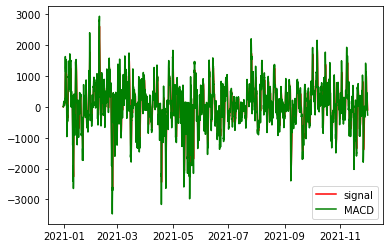

In [239]:
plt.plot(df.signal, label='signal', color='red')
plt.plot(df.MACD, label='MACD', color= 'green')
plt.legend()
plt.show()

In [240]:
Buy, Sell = [], []

for i in range (2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]: 
        Sell.append(i)

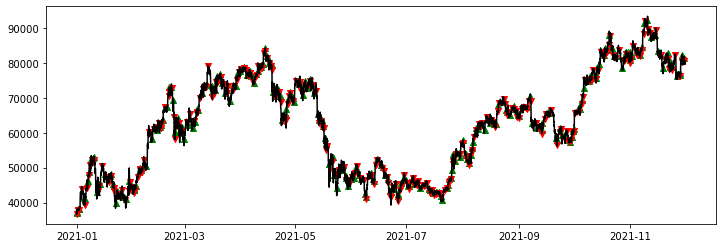

In [241]:
plt.figure(figsize=(12,4))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker="^", color='green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker="v", color='red')
plt.plot(df.Close, label='ETH Close', color = 'k')


In [242]:
realbuys = [i+1 for i in Buy]
realsells = [i+1 for i in Sell]

In [243]:
buyprices = df.Open.iloc[realbuys]
sellprices = df.Open.iloc[realsells]

In [244]:
if sellprices.index[0] < buyprices.index[0]:
    sellprices = sellprices.drop(sellprices.index[0])
elif buyprices.index[-1] > sellprices.index[-1]:
    buyprices = buyprices.drop(buyprices.index[-1])
buyprices

2020-12-31 16:00:00+00:00    37314.820312
2020-12-31 18:00:00+00:00    37145.363281
2021-01-01 12:00:00+00:00    38078.058594
2021-01-01 14:00:00+00:00    38289.140625
2021-01-02 00:00:00+00:00    38181.992188
                                 ...     
2021-11-27 01:00:00+00:00    76072.843750
2021-11-28 09:00:00+00:00    76372.046875
2021-11-28 20:00:00+00:00    76824.187500
2021-11-29 18:00:00+00:00    82244.265625
2021-11-30 14:00:00+00:00    81523.757812
Name: Open, Length: 298, dtype: float64

In [245]:
sellprices

2020-12-31 17:00:00+00:00    36863.203125
2021-01-01 07:00:00+00:00    37785.617188
2021-01-01 13:00:00+00:00    38009.886719
2021-01-01 16:00:00+00:00    37949.367188
2021-01-02 01:00:00+00:00    38010.109375
                                 ...     
2021-11-28 02:00:00+00:00    76172.070312
2021-11-28 17:00:00+00:00    76094.664062
2021-11-29 11:00:00+00:00    80080.492188
2021-11-30 00:00:00+00:00    80900.406250
2021-11-30 21:00:00+00:00    80729.906250
Name: Open, Length: 298, dtype: float64

In [246]:
profitsrel = []

for i in range (len(sellprices)):
    profitsrel.append((sellprices[i] - buyprices[i])/buyprices[i])

In [247]:
df = pd.DataFrame(profitsrel)
df

,0
0,-0.012103
1,0.017236
2,-0.001790
3,-0.008874
4,-0.004502
...,...
293,0.001304
294,-0.003632
295,0.042386
296,-0.016340


In [248]:
# profitsrel.columns = ['Profits']

In [249]:
# for i in range (len(profitsrel)):
#     if profitsrel < -.1:
#       profitsrel[i] = -.1  
    

In [250]:
average_profit = sum(profitsrel)/len(profitsrel)*100
largest_gain = max(profitsrel)*100
biggest_loss = min(profitsrel)*100
number_of_losses = df[df < 0].count()
number_of_winners = df[df > 0].count()


In [251]:
print(f'Average Profit =',average_profit,'%')
print(f'Largest Gain =',largest_gain,'%')
print(f'Biggest Loss =',biggest_loss,'%')
print(f'Number of Losses =',number_of_losses)
print(f'Number of Winners =',number_of_winners)

Average Profit = 0.38656596302847734 %
Largest Gain = 18.959603567202482 %
Biggest Loss = -7.636907556329348 %
Number of Losses = 0    178
dtype: int64
Number of Winners = 0    120
dtype: int64


In [252]:
pd.DataFrame(profitsrel).mean()

0    0.003866
dtype: float64

In [253]:
cumulative_profit = sum(profitsrel)*100
print(f'Profit =',cumulative_profit,'%')

Profit = 115.19665698248625 %


In [235]:
# matrix_siganls = []
# matrix_profits = []

# for i in range(len(sp500_df)):
   